In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hydroeval import evaluator, nse, kge, pbias
from tqdm import tqdm
import datetime as dt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors as pltc
import geopandas
import mapclassify
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42

In [6]:
## Data that have a value for all models and kge better than -5. ~166 gages (76 are better than -.41)

data = pd.read_csv("../data/pnwNP_modelStats_NewEps_NWM3.csv")
data = data[data.model!="nwm0"]

tt = data.groupby("gage", as_index=False)[['kge']].apply(lambda x: x.isna().sum())
tt = tt[tt.kge==0]
data = data[data["gage"].isin(tt['gage'])].reset_index(drop=True)
data = data[["gage", "model",'kge','kge_r','kge_a','kge_b']]


tmp = data.loc[(data["kge"]>=-1)] # Filter out shitty models
tmp = tmp.melt(id_vars=["gage", "model"], var_name="metric", value_name="value")
tmp['value']=tmp['value'].astype(float)

tmp = tmp.replace([np.inf, -np.inf], np.nan)
tmp2 = tmp.dropna().reset_index(drop=True)

In [9]:
## Save out list of gages for future plotting

xx = pd.DataFrame(tmp2.gage.unique())
xx.columns = ["gage"]
xx.to_csv("../data/KGE_gages.csv")

## Plot pie of KGE values

In [10]:
tmp2_kge = tmp2[tmp2.metric == 'kge']
less = len(tmp2_kge[tmp2_kge.value < -0.41])
greater = len(tmp2_kge) - less

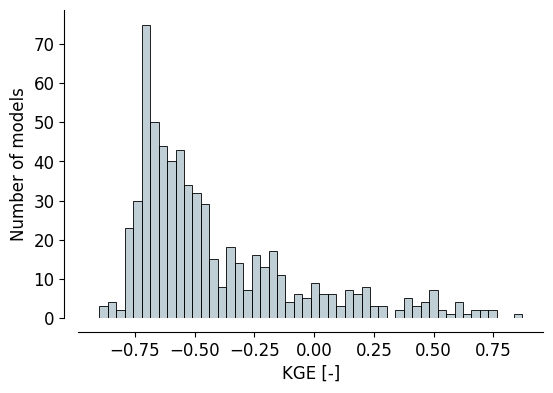

In [11]:
plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 12})

ax = sns.histplot(tmp2_kge,x = "value",
            bins = 50,
            color = "#839FAF",
            alpha = 0.5)
ax.set(ylabel="Number of models")
ax.set(xlabel="KGE [-]")

sns.despine(offset=10)

# plt.savefig('../docs/KGE_Histogram.png',dpi=600)

([<matplotlib.patches.Wedge at 0x2c82612b0>,
 [Text(-0.9414685622887797, -0.5688909792059443, 'KGE less than -0.41'),
  Text(1.027056559150631, 0.6206084307400813, 'KGE greater than -0.41')],
 [Text(-0.5135283067029707, -0.31030417047596964, '67%'),
  Text(0.5991163261712015, 0.36202158459838074, '33%')])

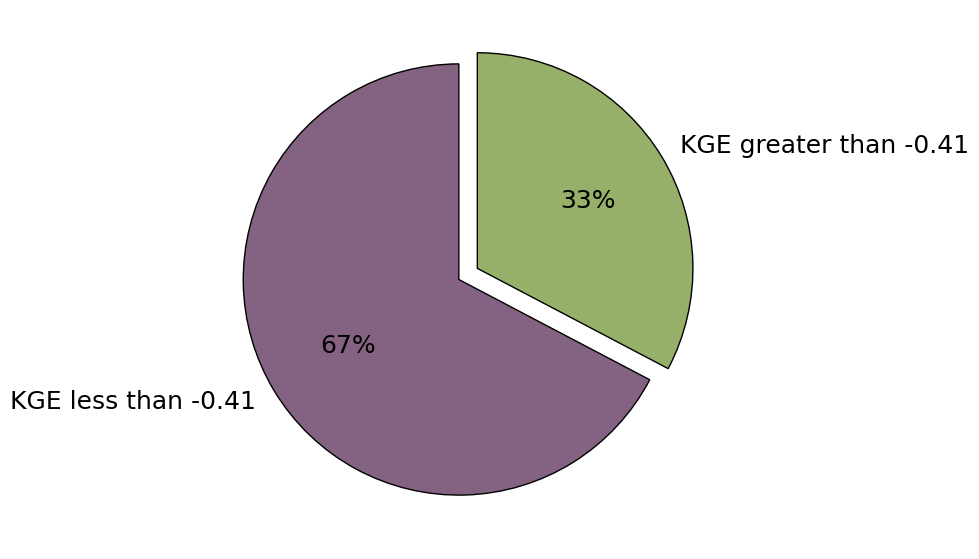

In [12]:
f,ax = plt.subplots(figsize=(10, 7))

labels = ["KGE less than -0.41","KGE greater than -0.41"]
sizes = [(less/len(tmp2_kge))*100,(greater/len(tmp2_kge))*100]

plt.rcParams.update({'font.size': 18})
colors = [ '#836381','#96B06A']
explode = (0, 0.1)
plt.pie(sizes,
        startangle=90, 
        colors=colors, 
        wedgeprops={'edgecolor': 'black'}, 
        autopct='%1.f%%', 
        explode=explode,
        labels = labels)

# plt.savefig('../docs/KGE_Pie.png',dpi=600)

## plot decomposition

/var/folders/h8/3y3yrzxd1pz8dl5xtstn3lgr0000gn/T/ipykernel_4520/2365252866.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])


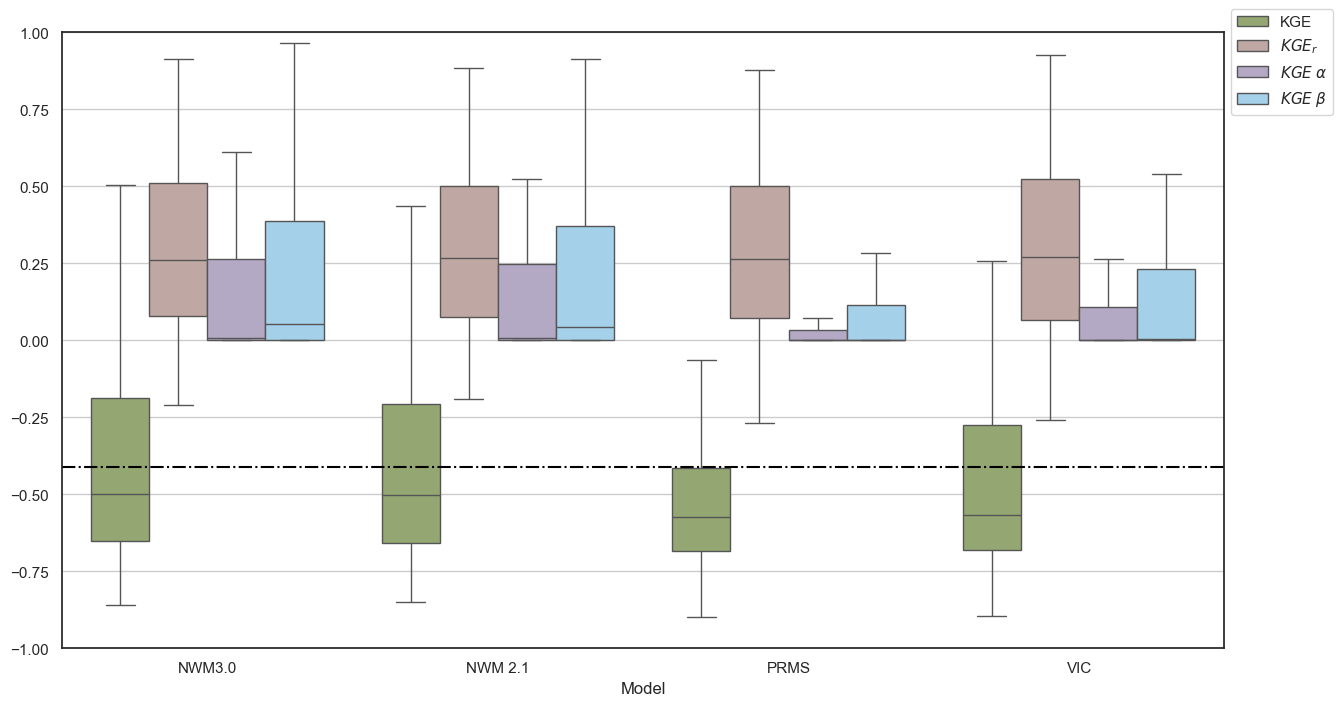

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15,8))


ax = sns.boxplot(data=tmp2, 
                 x="model", 
                 y="value",
                 hue = "metric",
                 showfliers=False,       
                 palette = ["#96B06A","#C4A49E","#B3A5C8","#98D3F5"],
                 order = ["nwm3","nwm1","prms","vic"])



ax.set_ylim([-1,1])
ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])
ax.set(ylabel=None)
ax.set(xlabel="Model")
ax.grid('on', which='major', axis='y')
ax.axhline(y=-0.41, color='black', linestyle='-.')
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=["KGE",r'$KGE_r$',r'$KGE_ \alpha$',r'$KGE_ \beta$'],bbox_to_anchor=(1.1, 1.05))


# plt.savefig("../docs/KGE_decomp_boxplot_filtered.png",dpi=600)
plt.savefig("../docs/KGE_decomp_boxplot_filtered.pdf")

## Plot just KGE

/var/folders/h8/3y3yrzxd1pz8dl5xtstn3lgr0000gn/T/ipykernel_4520/3472692236.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])


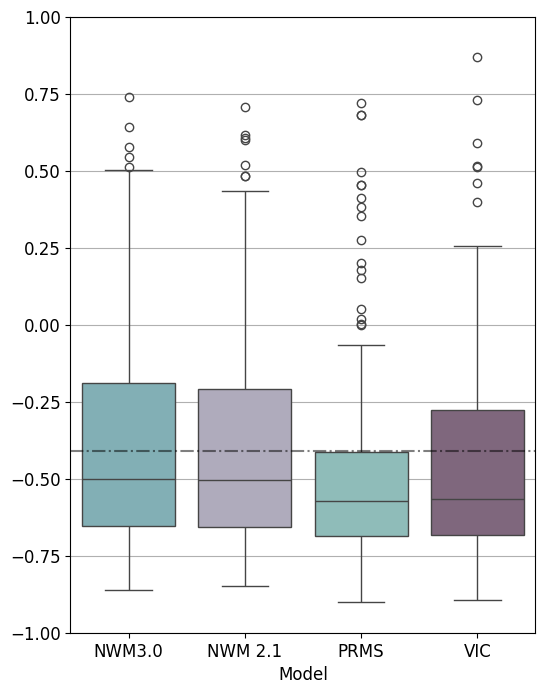

In [15]:
jj = tmp[tmp["metric"]=="kge"]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))

pal = {'nwm3': '#79B5BD',
       'nwm1': '#AEA8BF',
       'nwm0': '#839FAF',
       'prms': '#87C4BF',
       'vic': '#836381'}


ax = sns.boxplot(data=jj, 
                 x="model", 
                 y="value",
                 hue="model",
                 palette = pal,
                order = ["nwm3","nwm1","prms","vic"])

ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])
ax.set_ylim([-1,1])
ax.set(ylabel=None)
ax.set(xlabel="Model")
ax.grid('on', which='major', axis='y')
ax.axhline(y=-0.41, color='black', linestyle='-.',alpha=.5)
# ax.axhline(y=0, color='black',linewidth=0.75)

# plt.savefig("../docs/KGE_boxplot_all.png",dpi=600)
plt.savefig("../docs/KGE_boxplot_all.pdf")

In [ ]:
jj = tmp2[tmp2["metric"]=="kge"]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))


pal = {'nwm3': '#79B5BD',
       'nwm1': '#AEA8BF',
       'nwm0': '#839FAF',
       'prms': '#87C4BF',
       'vic': '#836381'}


ax = sns.boxplot(data=jj, 
                 x="model", 
                 y="value",
                 hue="model",
                 palette = pal,
                order = ["nwm3","nwm1","prms","vic"])

ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])
ax.set_ylim([-1,1])
ax.set(ylabel=None)
ax.set(xlabel="Model")
ax.grid('on', which='major', axis='y')
ax.axhline(y=-0.41, color='black', linestyle='-.',alpha=.5)
# ax.axhline(y=0, color='black',linewidth=0.75)

# plt.savefig("../docs/KGE_boxplot_filtered.png",dpi=600)

## Read in data frame with hydroclasses 

In [16]:
df = pd.read_csv("../data/pnwNP_StatsLocations_HydroClass.csv")
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.dec_long_va,df.dec_lat_va)).set_crs('epsg:4269')

# NEED TO FIGURE OUT WHY WE ARE LOSING 9 GAGES IN THIS MERGE. WHY ARENT THEY IN THE DF?

In [17]:
df = df[df["gage"].isin(tmp2['gage'])].reset_index(drop=True)

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,6))
sns.set_style("white",{'legend.frameon':True})

histPlot = df.melt(id_vars=["gage"],value_vars = ['propZero','propOne'])
histPlot["value"] = np.round(histPlot["value"],3)

g = sns.histplot(data=histPlot, x="value",
             hue="variable",
             multiple="stack",
             element="step",
             # log_scale=True,
             palette=["#7A748A","#79B5BD"],
            bins=20
            )
g.legend(['No-flow days','<1 cfs days'],loc = "upper right")
g.set_xlim([0,1])
sns.despine(offset=10, trim=True)
g.set(ylabel="Number of streamgages")
g.set(xlabel="% of record")

# plt.savefig("../docs/PNW_gage_dist.png",dpi=600)

In [18]:
pnw_hydro = geopandas.read_file("../data/mapping/pnw_hydrologic_landscape_class/PNW Hydrologic Landscape Class.shp")
pnw_hydro_repro = pnw_hydro.to_crs(epsg=4269)
pnw_hydro_repro.CLASS = pnw_hydro['CLASS'].astype(str).str[0:1]

states = geopandas.read_file("../data/mapping/cb_2018_us_state_5m/cb_2018_us_state_5m.shp")
states = states.to_crs(epsg=4269)
st = ["Idaho",'Washington','Oregon']
states = states[states["NAME"].isin(st)]

rivs = geopandas.read_file("../data/mapping/rs16my07/")
rivs = rivs.set_crs(epsg=4269)
rivs = geopandas.clip(rivs, states)
rivs = rivs[rivs["STRAHLER"]>=4]

In [43]:
# df = geopandas.clip(df, states)
tt = df[["site_no","HydroLandClass","geometry"]]
kgeOnly = tmp2[tmp2["metric"]=="kge"]
mapKGE = pd.merge(kgeOnly,tt,left_on="gage",right_on="site_no").reset_index(drop=True)

## KGE by hydroregion

/var/folders/h8/3y3yrzxd1pz8dl5xtstn3lgr0000gn/T/ipykernel_4520/3681185185.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Very wet","Wet","Moist","Dry","Semiarid","Arid"])


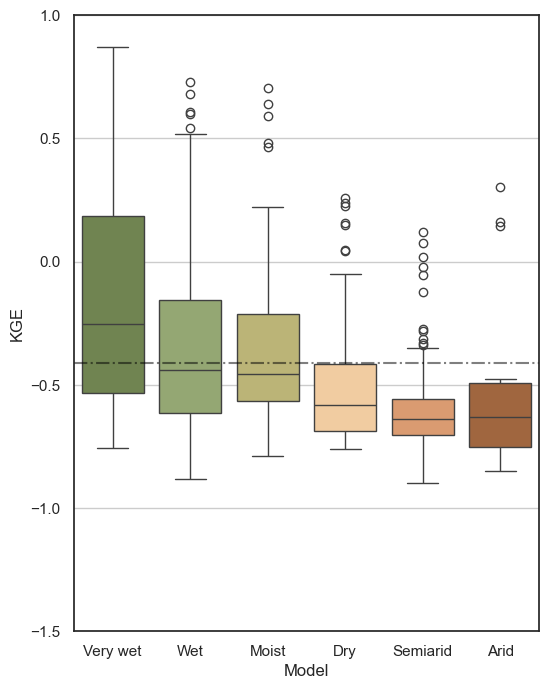

In [50]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))

my_order = ["very_wet",
            "wet",
            "moist",
            "dry",
            "semi_arid",
            "arid"]

pal = {'very_wet': '#728C48',
       'wet': '#96B06A',
       'moist': '#C6BD6C',
       'dry': '#FFCD93',
       'semi_arid': '#EC975F' ,
       'arid': '#B0632F'}


ax = sns.boxplot(data=mapKGE, 
                 x="HydroLandClass", 
                 y="value",
                 hue="HydroLandClass",
                 palette = pal,
                order = my_order)

ax.set_xticklabels(["Very wet","Wet","Moist","Dry","Semiarid","Arid"])
ax.set_ylim([-1.5,1])
ax.set(ylabel="KGE")
ax.set(xlabel="Model")
ax.grid('on', which='major', axis='y')
ax.axhline(y=-0.41, color='black', linestyle='-.',alpha=.5)

# plt.savefig("../docs/KGE_boxplot_HydroRegion.png",dpi=600)
plt.savefig("../docs/KGE_boxplot_HydroRegion.pdf")

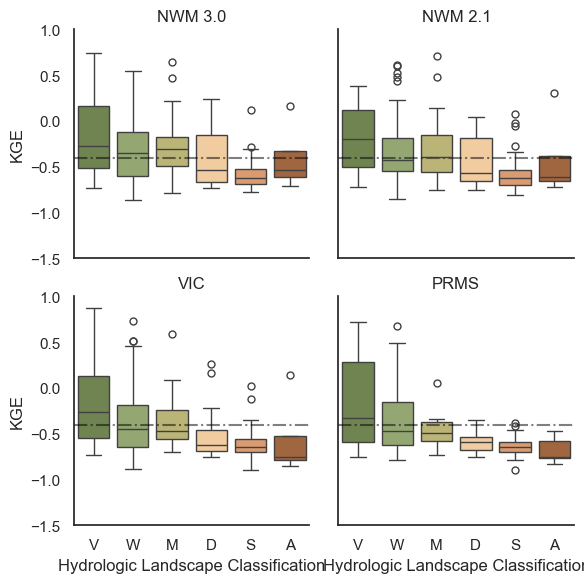

In [48]:
g = sns.catplot(
    data=mapKGE, x='HydroLandClass', y='value',
    col='model', kind='box', 
    col_wrap=2,height = 3, aspect  =1,
    order= my_order,hue = "HydroLandClass", palette=pal,
    col_order=['nwm3','nwm1','vic','prms']
)
g.map(plt.axhline,y=-0.41, color='black', linestyle='-.',alpha=.5)
g.set_xticklabels(["V","W","M","D","S","A"])
g.set(ylim=(-1.5, 1))
g.set(ylabel="KGE")
g.set(xlabel="Hydrologic Landscape Classification")

axes = g.axes.flatten()
axes[0].set_title("NWM 3.0")
axes[1].set_title("NWM 2.1")
axes[2].set_title("VIC")
axes[3].set_title("PRMS")

# plt.savefig("../docs/KGE_boxplot_HydroRegioModel_filtered.png",dpi=600)
plt.savefig("../docs/KGE_boxplot_HydroRegioModel_filtered.pdf")

## Plot KGE decomp by region

In [53]:
# df = geopandas.clip(df, states)
tt = df[["site_no","HydroLandClass","geometry"]]
# kgeOnly = tmp2[tmp2["metric"]!="kge"]
mapKGE = pd.merge(tmp2,tt,left_on="gage",right_on="site_no").reset_index(drop=True)

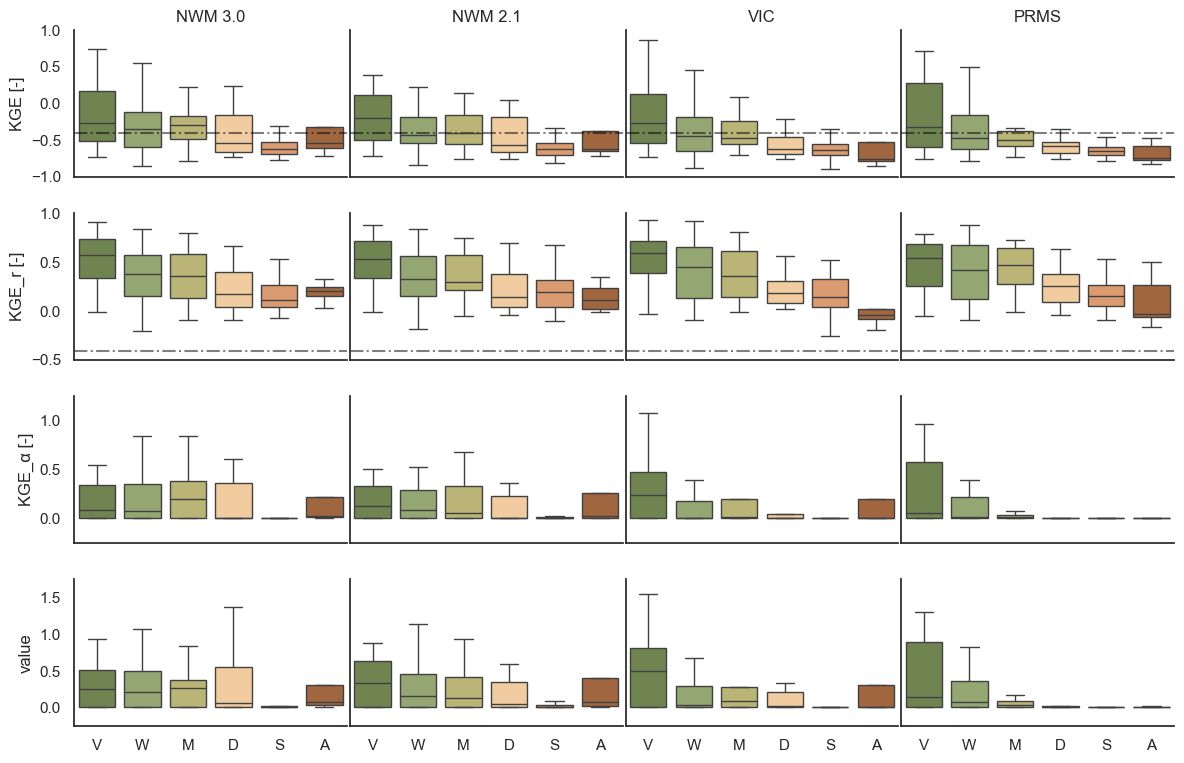

In [111]:
sns.set_theme(rc={'figure.figsize':(10,6)},style="white")

g = sns.catplot(
    data=mapKGE, x='HydroLandClass', y='value',
    col='model', row = "metric",kind='box', 
    height = 2, aspect = 1.5,sharey=False,
    order= my_order,hue = "HydroLandClass", palette=pal,
    col_order=['nwm3','nwm1','vic','prms'],**{"showfliers":False}
)
g.map(plt.axhline,y=-0.41, color='black', linestyle='-.',alpha=.5)
g.set_xticklabels(["V","W","M","D","S","A"])
g.set(xlabel=None)

axes = g.axes.flatten()
## Set titles
axes[0].set_title("NWM 3.0")
axes[1].set_title("NWM 2.1")
axes[2].set_title("VIC")
axes[3].set_title("PRMS")
axes[4].set_title(None)
axes[5].set_title(None)
axes[6].set_title(None)
axes[7].set_title(None)
axes[8].set_title(None)
axes[9].set_title(None)
axes[10].set_title(None)
axes[11].set_title(None)
axes[12].set_title(None)
axes[13].set_title(None)
axes[14].set_title(None)
axes[15].set_title(None)

## Set ylimits
axes[0].set_ylim([-1,1])
axes[1].set_ylim([-1,1])
axes[2].set_ylim([-1,1])
axes[3].set_ylim([-1,1])
axes[4].set_ylim([-.5,1])
axes[5].set_ylim([-.5,1])
axes[6].set_ylim([-.5,1])
axes[7].set_ylim([-.5,1])
axes[8].set_ylim([-.25,1.25])
axes[9].set_ylim([-.25,1.25])
axes[10].set_ylim([-.25,1.25])
axes[11].set_ylim([-.25,1.25])
axes[12].set_ylim([-.25,1.75])
axes[13].set_ylim([-.25,1.75])
axes[14].set_ylim([-.25,1.75])
axes[15].set_ylim([-.25,1.75])

## Set y label
axes[0].set_ylabel("KGE [-]")
axes[4].set_ylabel("KGE_r [-]")
axes[8].set_ylabel("KGE_α [-]")

## Remove labels
axes[1].tick_params(labelleft=False)
axes[2].tick_params(labelleft=False)
axes[3].tick_params(labelleft=False)
axes[5].tick_params(labelleft=False)
axes[6].tick_params(labelleft=False)
axes[7].tick_params(labelleft=False)
axes[9].tick_params(labelleft=False)
axes[10].tick_params(labelleft=False)
axes[11].tick_params(labelleft=False)
axes[13].tick_params(labelleft=False)
axes[14].tick_params(labelleft=False)
axes[15].tick_params(labelleft=False)


plt.subplots_adjust(wspace = 0.01,hspace=0.25)


plt.savefig("../docs/KGEdecomp_ByHydroClass.pdf")

In [69]:
axes

array([<Axes: title={'center': 'NWM 3.0'}, xlabel='Hydrologic', ylabel='value'>,
       <Axes: title={'center': 'NWM 2.1'}, xlabel='Hydrologic'>,
       <Axes: title={'center': 'VIC'}, xlabel='Hydrologic'>,
       <Axes: title={'center': 'PRMS'}, xlabel='Hydrologic'>,
       <Axes: title={'center': 'metric = kge_r | model = nwm3'}, xlabel='Hydrologic', ylabel='value'>,
       <Axes: title={'center': 'metric = kge_r | model = nwm1'}, xlabel='Hydrologic'>,
       <Axes: title={'center': 'metric = kge_r | model = vic'}, xlabel='Hydrologic'>,
       <Axes: title={'center': 'metric = kge_r | model = prms'}, xlabel='Hydrologic'>,
       <Axes: title={'center': 'metric = kge_a | model = nwm3'}, xlabel='Hydrologic', ylabel='value'>,
       <Axes: title={'center': 'metric = kge_a | model = nwm1'}, xlabel='Hydrologic'>,
       <Axes: title={'center': 'metric = kge_a | model = vic'}, xlabel='Hydrologic'>,
       <Axes: title={'center': 'metric = kge_a | model = prms'}, xlabel='Hydrologic'>,
     

In [18]:
## Plot Map and points

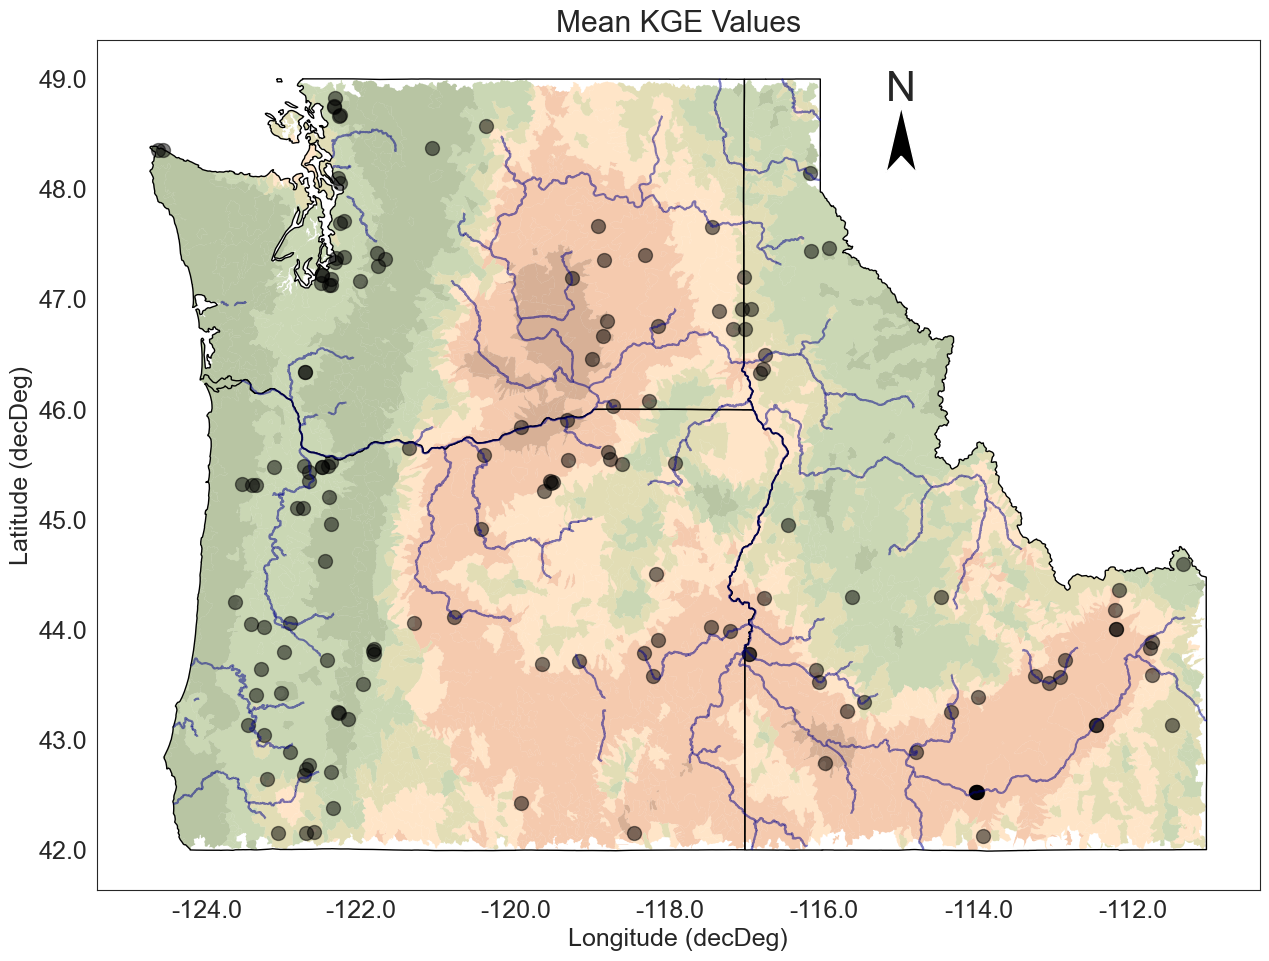

In [19]:
tt = mapKGE.groupby(["gage","geometry"],as_index=False)["value"].mean()
tt = geopandas.GeoDataFrame(tt)


plt.rcParams.update({'font.size': 18})


pal = {'V': '#728C48',
       'W': '#96B06A',
       'M': '#C6BD6C',
       'D': '#FFCD93',
       'S': '#EC975F' ,
       'A': '#B0632F',
        'B': "#000000"}



f,ax = plt.subplots(figsize=(15, 15))

pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(pal),alpha= .5,edgecolor="none")
states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')



tt.plot(ax=ax,
        markersize=100,
        alpha = .5,
        edgecolor = "black",
        color = "black",
        legend=True)
                
ax.arrow(-115, 48, 0, 0.75, length_includes_head=True,
          head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
ax.text(x=-115.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Mean KGE Values')

f.savefig('../docs/KGEmean_HydroRegion_filtered.png',dpi=600)
# f.savefig('../docs/KGEmean_HydroRegion.pdf')

In [20]:
gg = mapKGE.groupby(["HydroLandClass","gage","geometry"],as_index=False).count()

C:\Users\adamprice\AppData\Local\Temp\ipykernel_20824\474581271.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])


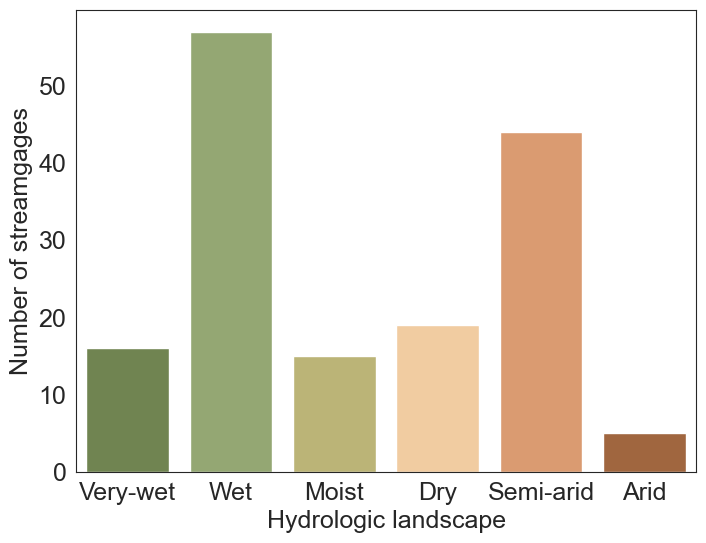

In [34]:
gg = mapKGE.groupby(["HydroLandClass","gage"],as_index=False).count()
# gg = gg[gg.model==5].groupby(["HydroLandClass","gage"],as_index=False).count()

f,ax = plt.subplots(figsize=(8, 6))

pal = {'very_wet': '#728C48',
       'wet': '#96B06A',
       'moist': '#C6BD6C',
       'dry': '#FFCD93',
       'semi_arid': '#EC975F' ,
       'arid': '#B0632F'}

my_order = ["very_wet",
            "wet",
            "moist",
            "dry",
            "semi_arid",
            "arid"]

ax = sns.countplot(gg, 
                 x='HydroLandClass',
                 hue="HydroLandClass",
                 palette = pal,
                order = my_order)

ax.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])
ax.set(ylabel="Number of streamgages")
ax.set(xlabel="Hydrologic landscape")

f.savefig('../docs/PNWgages_HydroRegion_filtered.png',dpi=600)

### KGE vs low and no flow

In [70]:
data = pd.read_csv("../data/pnwNP_modelStats_NewEps_NWM3.csv")
data = data[data.model!="nwm0"]
toPlot = data[data["gage"].isin(xx['gage'])].reset_index(drop=True)
toPlot = toPlot[toPlot.kge>=-1]
toPlot = toPlot[["kge","propZero","propOne"]]
toPlot = toPlot.melt(id_vars=["kge"], var_name="var", value_name="value")

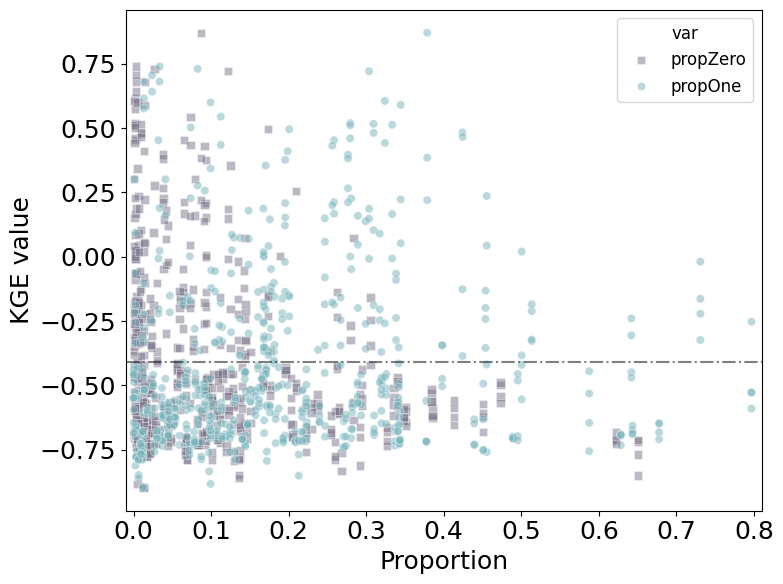

In [117]:
# markers = {"propZero":""}
f,ax = plt.subplots(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})


ax = sns.scatterplot(toPlot,
                x = "value",
                y = "kge",
                hue = "var",
                style = "var",
                alpha = 0.5,
                palette=["#7A748A","#79B5BD"],
                markers = ["s","o"],
                legend = "brief"
                   )

# sns.kdeplot(toPlot,
#                 x = "value",
#                 y = "kge",
#                 hue = "var",
#                 alpha = 0.7,
#                 palette=["#7A748A","#79B5BD"])


ax.set_xlim(-0.01,0.81)
ax.set(ylabel="KGE value")
ax.set(xlabel="Proportion")
# ax.grid('on', which='major', axis='y')
ax.axhline(y=-0.41, color='black', linestyle='-.',alpha=.5)

plt.tight_layout()


f.savefig('../docs/KGE_NoLowFlowProp.png',dpi=600)

# All gages better than KGE -5 plots.

<Axes: xlabel='value', ylabel='kge'>

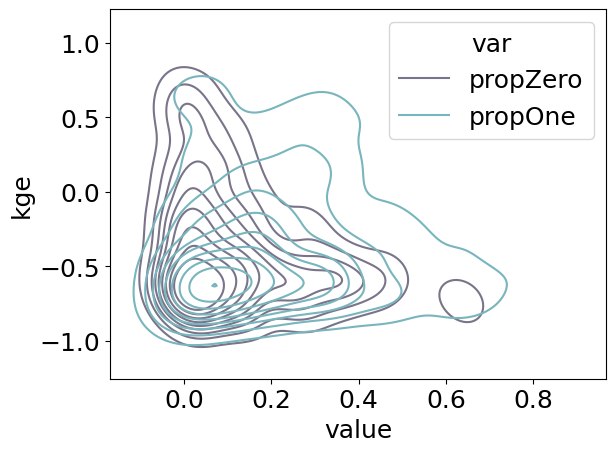

In [98]:
sns.kdeplot(toPlot,
                x = "value",
                y = "kge",
                hue = "var",
                # alpha = 0.6,
                palette=["#7A748A","#79B5BD"])

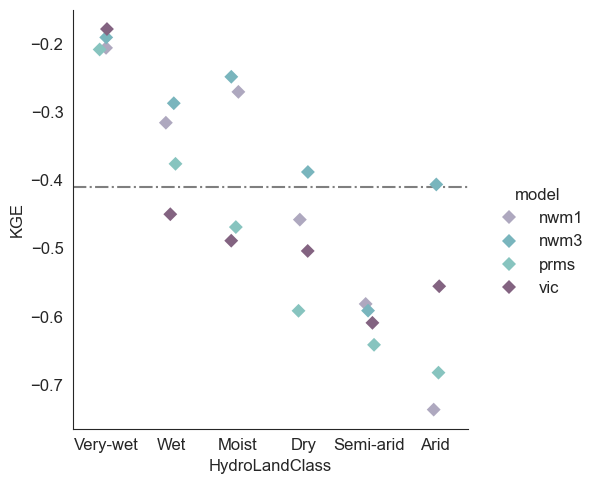

In [17]:
pDat = mapKGE.groupby(["HydroLandClass","model"],as_index=False)["value"].mean()

pal = {'nwm3': '#79B5BD',
       'nwm1': '#AEA8BF',
       'nwm0': '#839FAF',
       'prms': '#87C4BF',
       'vic': '#836381'}

ax = sns.catplot(
    data=pDat, 
    x='HydroLandClass', 
    y='value',
    order=my_order,
    hue = "model", 
    palette = pal,
    s=50,
    marker="D"
)

ax.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])
ax.set(ylabel="KGE")
ax.set(xlabel="HydroLandClass")
ax.map(plt.axhline,y=-0.41, color='black', linestyle='-.',alpha=.5)

plt.savefig("../docs/KGE_boxplot_HydroRegionModel_ModelRegion.png",dpi=600)

In [4]:
## All data with KGE better than -5. ~359 gages

data = pd.read_csv("../data/pnwNP_modelStats_NewEps_NWM3.csv")
data = data[data.model!="nwm0"]

data = data[["gage", "model",'kge','kge_r','kge_a','kge_b']]


tmp = data.loc[(data["kge"]>=-5)] # Filter out shitty models
tmp = tmp.melt(id_vars=["gage", "model"], var_name="metric", value_name="value")
tmp['value']=tmp['value'].astype(float)

tmp = tmp.replace([np.inf, -np.inf], np.nan)
tmp = tmp.dropna().reset_index(drop=True)

## plot decomposition

C:\Users\adamprice\AppData\Local\Temp\ipykernel_20824\3575192812.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])


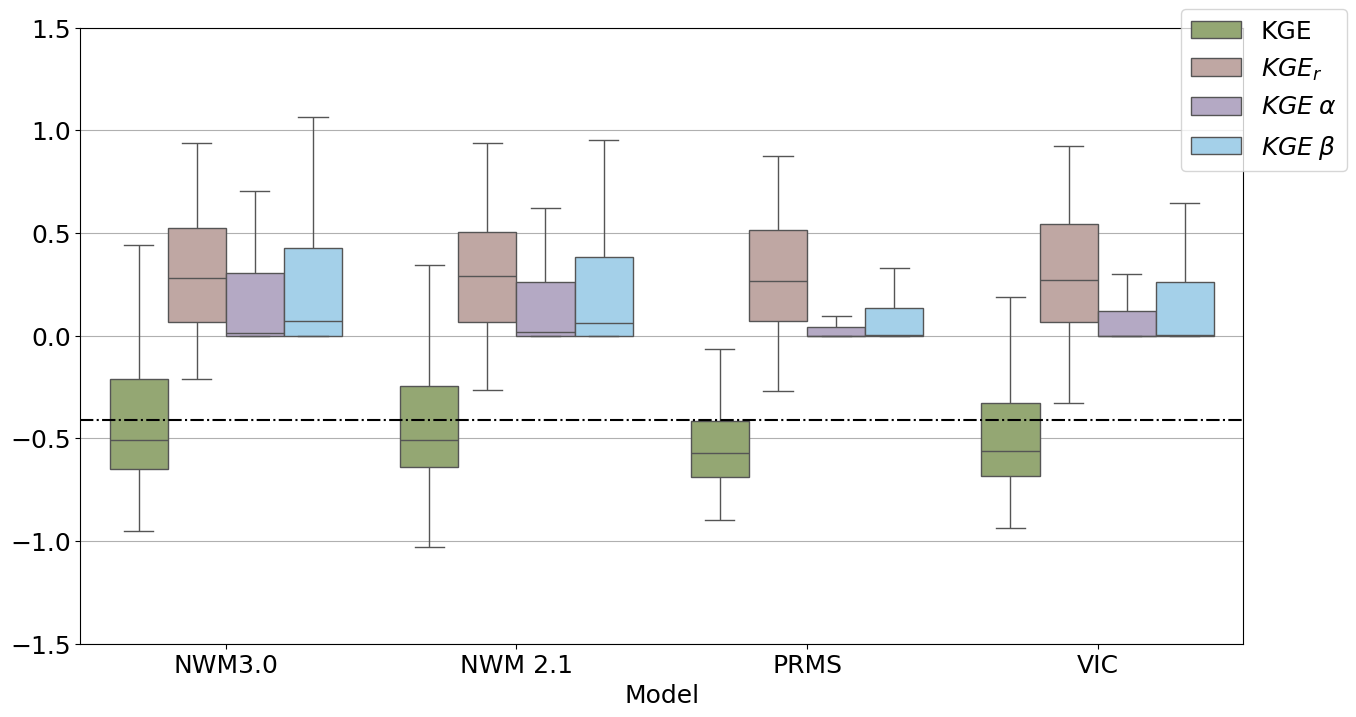

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(15,8))


ax = sns.boxplot(data=tmp, 
                 x="model", 
                 y="value",
                 hue = "metric",
                 showfliers=False,             
                 palette = ["#96B06A","#C4A49E","#B3A5C8","#98D3F5"],
                 order = ["nwm3","nwm1","prms","vic"])



ax.set_ylim([-1.5,1.5])
ax.set_xticklabels(["NWM3.0","NWM 2.1","PRMS","VIC"])
ax.set(ylabel=None)
ax.set(xlabel="Model")
ax.grid('on', which='major', axis='y')
ax.axhline(y=-0.41, color='black', linestyle='-.')
hands, labs = ax.get_legend_handles_labels()
plt.legend(handles=hands, labels=["KGE",r'$KGE_r$',r'$KGE_ \alpha$',r'$KGE_ \beta$'],bbox_to_anchor=(1.1, 1.05))



plt.savefig("../docs/KGE_decomp_boxplot_all.png",dpi=600)

## Plot archive

In [ ]:
# mapKGE.plot.scatter(x = "propZero",y="value")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object

pal = {'wet': 'lightskyblue',
          'very_wet': 'dodgerblue' ,
          'dry': 'navajowhite',
          'moist': 'papayawhip',
          'semi_arid': 'salmon' ,
          'arid': 'orangered'}



# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(mapKGE, row="HydroLandClass", hue="HydroLandClass", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
# g.map(sns.histplot, "value",
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)
# g.map(sns.histplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)


g.map(sns.histplot, "value", clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
# g.map(sns.histplot, "value", clip_on=False, color="w", lw=2)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


# g.map(label, "KGE value")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


In [ ]:
tt = mapKGE.groupby(["gage","geometry"],as_index=False)["value"].mean()
tt = geopandas.GeoDataFrame(tt)


plt.rcParams.update({'font.size': 18})


pal = {'V': '#728C48',
       'W': '#96B06A',
       'M': '#C6BD6C',
       'D': '#FFCD93',
       'S': '#EC975F' ,
       'A': '#B0632F',
        'B': "#000000"}



f,ax = plt.subplots(figsize=(15, 15))

pnw_hydro_repro.plot(ax=ax,legend=True,color = pnw_hydro_repro['CLASS'].map(pal),alpha= .5,edgecolor="none")
states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')



tt.plot(ax=ax,
        markersize=100,
        alpha = .75,
        edgecolor = "black",
        legend=True,
        scheme="quantiles",
        cmap="PuOr", 
        column='value')
                
ax.arrow(-115, 48, 0, 0.75, length_includes_head=True,
          head_width=0.4, head_length=0.6, overhang=.25, facecolor='k')
ax.text(x=-115.2, y=48.8, s='N', fontsize=30)
ax.set_xlabel("Longitude (decDeg)")
ax.set_ylabel("Latitude (decDeg)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_title('Mean KGE Values')

# f.savefig('../docs/KGEmean_HydroRegion.png',dpi=600)
# f.savefig('../docs/KGEmean_HydroRegion.pdf')

In [ ]:
plt.rcParams.update({'font.size': 18})
f,ax = plt.subplots(figsize=(15, 15))

states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')
ss= mapKGE[mapKGE["model"]=="vic"]

ss.plot(ax=ax,
        markersize=100,
        alpha = .5,
        edgecolor = "black",
        legend=True,
        scheme="EqualInterval",
        # scheme="user_defined", 
        # classification_kwds={'bins':[.1,.3, .5, .7]},
        cmap="viridis", 
        column='value')

In [ ]:
plt.rcParams.update({'font.size': 18})
f,ax = plt.subplots(figsize=(15, 15))

states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')
ss= mapKGE[mapKGE["model"]=="prms"]

ss.plot(ax=ax,
        markersize=100,
        alpha = .5,
        edgecolor = "black",
        legend=True,
        # scheme="EqualInterval",
        scheme="user_defined", 
        classification_kwds={'bins':[.1,.3, .5, .7]},
        cmap="viridis", 
        column='value')

In [ ]:
plt.rcParams.update({'font.size': 18})
f,ax = plt.subplots(figsize=(15, 15))

states.plot(ax=ax,facecolor="none",edgecolor = "black")
rivs.plot(ax=ax,
          alpha = .5,
          edgecolor='darkblue')
ss= mapKGE[mapKGE["model"]=="nwm0"]

ss.plot(ax=ax,
        markersize=100,
        alpha = .5,
        edgecolor = "black",
        legend=True,
        # scheme="EqualInterval",
        scheme="user_defined", 
        classification_kwds={'bins':[.1,.3, .5, .7]},
        cmap="viridis", 
        column='value')